In [1]:
from cached_property import cached_property
import cf_units
import datetime
import iris
from iris.analysis.calculus import differentiate
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
#
import umtools.irismode as umt
from umtools.utils import grdstep

In [2]:
import iris.quickplot as qplt

In [3]:
import pyveccalc.iris_api as icalc

In [4]:
%matplotlib inline

In [5]:
# plt.style.reload_library()
plt.style.use('awesome')

In [6]:
iris.FUTURE.netcdf_promote = True
um_res = grdstep('km2p2')

In [7]:
fcst_init = '25_1200'

In [8]:
f = iris.load('/local/fwv14jru/UEA/ACCACIA/UM/exp_results/km2p2/25_1200/model_levels_full/processed/umnsa_rlev_obs_11-14h_014-proc.nc')

In [9]:
f

[<iris 'Cube' of geopotential_height / (m) (model_level_number: 40; grid_latitude: 599; grid_longitude: 599)>,
<iris 'Cube' of surface_altitude / (m) (grid_latitude: 599; grid_longitude: 599)>,
<iris 'Cube' of surface_altitude / (m) (grid_latitude: 599; grid_longitude: 599)>,
<iris 'Cube' of surface_altitude / (m) (grid_latitude: 599; grid_longitude: 599)>,
<iris 'Cube' of surface_altitude / (m) (grid_latitude: 599; grid_longitude: 599)>,
<iris 'Cube' of upward_air_velocity / (m s-1) (model_level_number: 40; grid_latitude: 599; grid_longitude: 599)>,
<iris 'Cube' of x_wind / (m s-1) (model_level_number: 40; grid_latitude: 599; grid_longitude: 599)>,
<iris 'Cube' of y_wind / (m s-1) (model_level_number: 40; grid_latitude: 599; grid_longitude: 599)>]

In [10]:
u_orig = f.extract_strict('x_wind')
v_orig = f.extract_strict('y_wind')
u_orig, v_orig = umt.unrotate_uv(u_orig, v_orig)
w_orig = f.extract_strict('upward_air_velocity')

In [11]:
u = icalc.replace_lonlat_dimcoord_with_cart(u_orig, dx=um_res.to_flt())
v = icalc.replace_lonlat_dimcoord_with_cart(v_orig, dx=um_res.to_flt())
w = icalc.replace_lonlat_dimcoord_with_cart(w_orig, dx=um_res.to_flt())
w.rename('z_wind')

In [12]:
A = icalc.AtmosFlow(u,v,w)
wk = icalc.replace_dimcoord(A.kvn, u_orig)

In [13]:
c_red = mpl.colors.colorConverter.to_rgba('red')
c_blue= mpl.colors.colorConverter.to_rgba('blue')
c_white_trans = mpl.colors.colorConverter.to_rgba('white',alpha = 0.0)
cmap_rb = mpl.colors.LinearSegmentedColormap.from_list('cmap_BuRd',[c_blue,c_white_trans,c_red],64)
cmap_rb.set_over('magenta')
cmap_rb.set_under('navy')
bounds = [-10,-1,1,10]
norm = mpl.colors.BoundaryNorm(bounds, cmap_rb.N)
wk_kw = dict(norm=norm, levels=bounds, cmap=cmap_rb, extend='both')

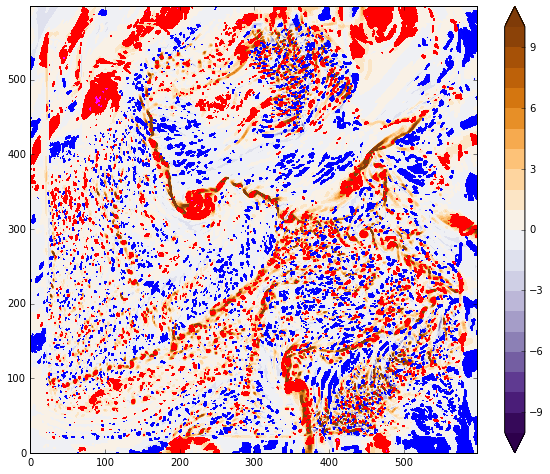

In [14]:
plt.figure(figsize=(10,8))
p = plt.contourf(A.rel_vort.data[8,...]*1e4, levels=np.arange(-10,11,1), cmap='PuOr_r', extend='both')
plt.contourf(A.kvn.data[8,...], **wk_kw)
plt.colorbar(p)

In [15]:
def _show_points(cube, i1=1, i2=4):
    print(cube.name())
    print(cube.coord(axis='x').name(), cube.coord(axis='x').points[i1:i2], len(cube.coord(axis='x').points))
    print(cube.data[0,0,i1:i2])
    print(cube.coord(axis='y').name(), cube.coord(axis='y').points[i1:i2], len(cube.coord(axis='y').points))
    print(cube.data[0,i1:i2,0])

In [16]:
_show_points(u)

transformed_x_wind
longitude [ 2200.  4400.  6600.] 599
[ 2.60661744  2.6738313   2.73421348]
latitude [ 2200.  4400.  6600.] 599
[ 2.57115471  2.61472129  2.67054189]
